<a href="https://colab.research.google.com/github/Chris1Areiza/lime/blob/main/PRUEBA_T%C3%89CNICA_CIENT%C3%8DFICO_DE_DATOS_SENIOR_PACTIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PRUEBA TÉCNICA CIENTÍFICO DE DATOS SENIOR PACTIA**

<p align="justify">
Mediante el presente cuaderno se pretender desarrollar la prueba técnica para optar por la posición de científico de datos senior en Pactia. Como se sabe, la prueba consta de tres partes, la primera evalúa los conocimientos en consultas de SQL, la segunda evalúa la lógica de programación y el tercero el conocimiento en aprendizaje automático. A excepción del primer punto, el resto de puntos se desarrolla en Python.


##**Problema 1 - Consultas en SQL**

<p align="justify">
a) Tienes una tabla llamada empleados con columnas como id, nombre, apellido,
departamento_id, y necesitas seleccionar todos los empleados que pertenecen al
departamento de Ventas (departamento_id = 1).

```SQL
SELECT *
FROM empleados
WHERE departamento_id = 1;
```

b) Calcular la cantidad total de productos vendidos por categoría, ordenada por la cantidad descendente. La tabla se llama "productos".

```SQL
SELECT categoria, SUM(ventas) AS cantidad_total
FROM productos
GROUP BY categoria
ORDER BY cantidad_total DESC;
```

c) Calcular el salario promedio de los empleados en cada departamento. A continuación,
se da un head de las tablas “empleados” y “departamentos”:

```SQL
SELECT d.id AS id_departamento, d.nombre AS nombre_departamento, AVG(e.salario) AS salario_promedio
FROM empleados e
INNER JOIN departamentos d ON e.departamento_id = d.id
GROUP BY d.id, d.nombre;
```

d) Obtener la lista de clientes que han realizado compras en los últimos 3 meses, ordenados por la fecha de compra más reciente.

```SQL
SELECT c.id AS cliente_id, c.nombre, c.apellido, co.fecha_compra
FROM clientes c
INNER JOIN compras co ON c.id = co.cliente_id
WHERE co.fecha_compra >= DATEADD(MONTH, -3, CURRENT_DATE)
ORDER BY co.fecha_compra DESC;
```


##**Problema 2 - Lógico de programación**

<p align="justify">
El objetivo de este problema es escribir una función que determine si un Sudoku de 9×9 es válido. Recuerda que un Sudoku es válido si satisface 3 condiciones: cada fila contiene los dígitos de 1 a 9 sin repetición, cada columna contiene los dígitos de 1 a 9 sin repetición, y cada uno de los subcuadros 3×3 contienen los dígitos de 1 a 9 sin repetición. Puedes usar el siguiente sudoku de prueba:

```
[[5, 3, 4, 6, 7, 8, 9, 1, 2],
[6, 7, 2, 1, 9, 5, 3, 4, 8],
[1, 9, 8, 3, 4, 2, 5, 6, 7],
[8, 5, 9, 7, 6, 1, 4, 2, 3],
[4, 2, 6, 8, 5, 3, 7, 9, 1],
[7, 1, 3, 9, 2, 4, 8, 5, 6],
[9, 6, 1, 5, 3, 7, 2, 8, 4],
[2, 8, 7, 4, 1, 9, 6, 3, 5],
[3, 4, 5, 2, 8, 6, 1, 7, 9]]
```
<p align="justify">
Como comentario, nota que el objetivo de este problema NO es crear un solucionador de Sudoku, sino simplemente determinar si los números del tablero son válidos.

**Solución**

<p align="justify">
Se realiza una función con una función anidada para verificar cada una de las condiciones para que un sudoku sea sudoku.  Se crea entonces la función es_sudoku que toma como argumento 'sudo' que de acuerdo con el sudoku de prueba ingresa como una lista de listas.
<p align="justify">
La función interna llamada sudoku_valido recibe el argumento 'arr', esa función verifica si una fila, columna o subcuadro de 3x3 es válido. El argumento 'arr' es una lista a verificar. En este punto quiero aclarar que se crea la función anidada sudoku_valido ya que la idea es modularizar y reutilizar código, en este caso el que verifica si una fila, columna o subcuadro es válido, de esa forma le quitamos complejidad al código para que sea más mantenible y no repetimos la lógica varias veces.
<p align="justify">
Ahora si, esa función anidada, como ya se mencionó, toma el argumento 'arr', se inicializa con un conjunto vacío llamado num_revisados que se usa para rastrear los números de una fila, columna o subcuadro. Se valida como numero en 'arr' mediante un bucle que iteral através de cada número en 'arr' y comprueba lo siguiente:
Si el número se repite en num_revisados entonces la fila, la columna o el subcuadro no es válido por lo que la función devolverá False. También si el número es mayor a 9 o menor a 1 devolverá False porque se encuentra por fuera del rango esperado. Si el número pasa ambas condiciones entonces se agrega a num_revisados.
<p align="justify">
Se procede entonces con la verificación de las filas y de las columnas. Se inicia con un bucle for que itera desde el índice 0 al 8. Fila corresponde a cada fila del argumento sudo, es decir, en cada iteración se obtiene una fila del sudoku y se almacena en 'fila', con 'sudo[i]' se obtiene la fila i del sudoku. Por su parte la columna corresponde a una lista llamada 'columna' que se crea mediante list comprenhension donde sudo[j][i] selecciona el elemento en la fija j y la columna i para j entre 0 y 8 como índices. De manera sencilla, sudo[j] es una fila específica y sudo[j][i] selecciona el elemento en la fija j y la columna i, eso se hace para cada fila en el rango 0 a 8, lo que entrega una lista de elementos de la columna i.
Luego se verifica si tanto la fila como la columna son válidas llamando a la función sudoku_valido para cada una. La función va comprobar si no hay números repetidos en la fila o columna, si alguna tiene números repetidos entonces la condición )if not) será True, es decir, el Sudoku no sería válido, si resulta False entonces sería válido.
<p align="justify">
El tercer bloque hace una verificación pos subcuadros de 3x3, para ello se crea un bucle interior que itera a través de los índices de fila de los subcuadros, comienza en 0 y se mueve en incrementos de 3 para lo que i tomará los valores de 0,3, 6, representan los índices de las filas donde comienza cada subcuadro. Ahora, el bucle interior itera a través de los índices de la columna de los subcuadros, de igual forma comienza en 0 y se mueve en incrementos de 3 por lo que j toma los valores 0, 3 y 6. Cuando los bucles iteran en cada iteración se crea una lista llamada subcuadro también mediante list comprenhension usando dos bucles anidados, el prumero itera a través de los indices de la fila en el rango de i a i+3 lo que representa las filas del subcuadro actual y el segundo bucle iteral a través de los índices de columna en el rango de j a j+3 lo que representa las columnas del subcuadro actual. Lo que hace sudo[x][y] es seleccionar los elementos correspondientes del sudoku para construir la lista subcuadro, así 'subcuadro' contendrá todos los elementos del subcuadro 3x3 actual.
Luego se llama la función sudoku_valido para verificar la validez del subcuadro, si hay números repetidos en la lista 'subcuadro' entonces la condición (if not) será True, en caso contrario será False y el soduku será válido.
<p align="justify">
Se hace de ese modo (con condiciones if not) en las filas, columnas y subcuadros porque lo que se busca es verificar si una lista no es válida, con if not si se encuentra que una lista no es válida entonces devolverá False, entonces la función devolverá False con la primera lista no válida que encuentre, mientras que si se usa condicionales if return True, tan pronto la función encuentre una lista válida la función terminaría y devolvería True lo que dejaría incompleta la validación.
<p align="justify">
Finalmente si todas las filas, columnas y subcuadros del sudoku son válidas entonces la función 'es_sudoku' devuelve True indicando que el Sudoku es válido. Se prueba entonces con el sudoku indicado en el enunciado mediante la lista sudoku_prueba y se llama a la función es_sudoku a la que se le pasa como argumento el sudoku_prueba mediante una verificación condicional, es decir, si la función 'es_sudoku' devuelve True entonces el sudoku es válido y se imprime el mensaje "El sudoku es válido", si por el contrario devuelve False entonce se imprime el mensaje "El sudoku no es válido". Se hace esa verificación condicional para no imprimir en diferentes puntos del código de la función si el sudoku es válido o no.

In [ ]:
def es_sudoku(sudo):
    # Función para validar si una lista (fila, columna o subcuadro) es válida o no.
    def sudoku_valido(arr):
        num_revisados = set()
        for num in arr:
            if num in num_revisados:
                return False
            if num > 9 or num < 1:
                return False
            num_revisados.add(num)
        return True

    # Se realiza la verificación en filas y columnas.
    for i in range(9):
        fila = sudo[i]
        columna = [sudo[j][i] for j in range(9)]
        if not (sudoku_valido(fila) and sudoku_valido(columna)):
            return False

    # Se realizar la verificación ahora en subcuadros de a 3x3.
    for i in range(0, 9, 3):
        for j in range(0, 9, 3):
            subcuadro = [sudo[x][y] for x in range(i, i + 3) for y in range(j, j + 3)]
            if not sudoku_valido(subcuadro):
                return False

    return True

# Sudoku de prueba
sudoku_prueba = [
    [5, 3, 4, 6, 7, 8, 9, 1, 2],
    [6, 7, 2, 1, 9, 5, 3, 4, 8],
    [1, 9, 8, 3, 4, 2, 5, 6, 7],
    [8, 5, 9, 7, 6, 1, 4, 2, 3],
    [4, 2, 6, 8, 5, 3, 7, 9, 1],
    [7, 1, 3, 9, 2, 4, 8, 5, 6],
    [9, 6, 1, 5, 3, 7, 2, 8, 4],
    [2, 8, 7, 4, 1, 9, 6, 3, 5],
    [3, 4, 5, 2, 8, 6, 1, 7, 9]
]

if es_sudoku(sudoku_prueba):
    print("El sudoku es válido")
else:
    print("El sudoku no es válido")


El Sudoku es válido.


##**Problema 3 - Machine Learning**

<p align="justify">
En la compañía se desea construir un modelo que ayude a determinar los precios de arriendo de los inmuebles, por tal motivo, se ha recogido información a nivel nacional del precio de diferentes inmuebles y sus atributos (pricing.xlsx). Lo que debes hacer en este enunciado es lo siguiente:

* Hacer un análisis exploratorio de los datos y comentar los resultados obtenidos.
* Hacer una limpieza de los datos en caso de ser necesario.
* Hacer una selección de variables para el entrenamiento de un modelo que nos ayude a predecir los precios de alquiler de los inmuebles.
* Entrenar al menos 3 modelos y seleccionar el mejor. Recuerda justificar tu elección.




###**Descripción de variables**

Para tener un mayor entendimiento, vamos a describir las variables del dataset. Se tienen en total 26 variables.

**tipo_inmueble:** Representa el tipo de inmueble y puede tomar uno de los siguientes valores:

Edificio de Oficinas (id_tipo_inmueble: 10)
Bodega (id_tipo_inmueble: 8)
Local Comercial (id_tipo_inmueble: 6)
Oficina (id_tipo_inmueble: 3)

Es una variable cualitativa nominal.

**id_tipo_inmueble:** Es un identificador numérico correspondiente al tipo de inmueble. Es una variable categórica.

**ciudad:** La ciudad donde se encuentra el inmueble. Los valores posibles son numerosos y varían desde Bogotá D.C. hasta otras ciudades como Cali, La Estrella, Cartagena de Indias, entre otras. Es una variable cualitativa nominal.

**id_ciudad:** Es un identificador numérico correspondiente a la ciudad. Es una variable categórica.

**barrio_catastral:** El barrio catastral del inmueble.

**antiguedad:** La antigüedad del inmueble, expresada en categorías que indican el rango de años. Las categorías son "Entre 5 y 10 años", "Más de 20 años", "Entre 10 y 20 años", "Entre 0 y 5 años", y "Remodelado". Es una variable categórica.

**estrato:** El estrato socioeconómico del inmueble, expresado en números, donde 0 sería el estrato más bajo y 7 el estrato más alto. Aunque en la data se encuentran registros en estrato -1 (solo 2). Es una variable categórica.

**precio_arriendo:** El precio de arriendo del inmueble en pesos colombianos. Es una variable cuantitativa continua y corresponde a la variable respuesta para un modelo de aprendizaje automático. Es una variable cuantitativa continua.

**area_construida_desde:** El área construida del inmueble en metros cuadrados. Es una variable cuantitativa continua.

**area_privada_desde:** El área privada del inmueble en metros cuadrados. Es una variable cuantitativa continua.

**precio_arriendo_m2:** El precio de arriendo por metro cuadrado del inmueble. De entrada se prevee una correlación entre esta variable y precio_arriendo y area_construida_desde dado que es una combinación de esas dos variables. Es una variable cuantitativa continua.

**sobre_via_principal:** Una variable booleana que indica si el inmueble se encuentra sobre una vía principal (1 si es cierto, 0 si no lo es).

**cerca_transporte_publico:** Una variable booleana que indica si el inmueble está cerca del transporte público (1 si es cierto, 0 si no lo es).

**cerca_supermercados:** Una variable booleana que indica si el inmueble está cerca de supermercados (1 si es cierto, 0 si no lo es).

**cerca_colegios_universidades:** Una variable booleana que indica si el inmueble está cerca de colegios o universidades (1 si es cierto, 0 si no lo es).

**cerca_centros_comerciales:** Una variable booleana que indica si el inmueble está cerca de centros comerciales (1 si es cierto, 0 si no lo es).

**parqueadero_visitantes:** Una variable booleana que indica si el inmueble cuenta con parqueadero para visitantes (1 si es cierto, 0 si no lo es).

**ascensor:** Una variable booleana que indica si el inmueble cuenta con ascensor (1 si es cierto, 0 si no lo es).

**porteria:** Una variable booleana que indica si el inmueble cuenta con portería (1 si es cierto, 0 si no lo es).

**conjunto_cerrado:** Una variable booleana que indica si el inmueble se encuentra en un conjunto cerrado (1 si es cierto, 0 si no lo es).

**vigilancia:** Una variable booleana que indica si el inmueble cuenta con servicio de vigilancia (1 si es cierto, 0 si no lo es).

**zona_comercial:** Una variable booleana que indica si el inmueble se encuentra en una zona comercial (1 si es cierto, 0 si no lo es).

**zona_residencial:** Una variable booleana que indica si el inmueble se encuentra en una zona residencial (1 si es cierto, 0 si no lo es).

**acceso_discapacitados:** Una variable booleana que indica si el inmueble tiene acceso para discapacitados (1 si es cierto, 0 si no lo es).

**latitud:** La latitud geográfica de la ubicación del inmueble.

**longitud:** La longitud geográfica de la ubicación del inmueble.

###**Entendimiento de la data**

In [40]:
# Importar librerías necesarias.
import pandas as pd
from google.colab import drive
import seaborn as sns # visualización
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [41]:
#Leer los datos desde el excel.
drive.mount('/content/drive')
data = pd.read_excel('/content/drive/MyDrive/pricing.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
# Imprimir la forma y los primeros registros del dataset.
print(data.shape)
data.head()

(31503, 26)


,tipo_inmueble,id_tipo_inmueble,ciudad,id_ciudad,barrio_catastral,antiguedad,estrato,precio_arriendo,area_construida_desde,area_privada_desde,...,parqueadero_visitantes,ascensor,porteria,conjunto_cerrado,vigilancia,zona_comercial,zona_residencial,acceso_discapacitados,latitud,longitud
0,Edificio de Oficinas,10,Bogotá D.C.,1,SAMPER MENDOZA,Entre 5 y 10 años,3.0,65000000.0,3000.00,3000.00,...,0,1,0,0,0,0,0,0,0.000000,0.000000
1,Edificio de Oficinas,10,Cali,4,TEQUENDAMA,Más de 20 años,5.0,18000000.0,423.00,423.00,...,0,0,0,0,1,0,0,0,3.421000,-76.544000
2,Edificio de Oficinas,10,Bogotá D.C.,1,LA SOLEDAD,Más de 20 años,4.0,20000000.0,680.00,680.00,...,0,1,0,0,0,0,0,0,4.624383,-74.074930
3,Edificio de Oficinas,10,Bogotá D.C.,1,LA CASTELLANA,Entre 5 y 10 años,5.0,43500000.0,1326.00,1326.00,...,0,0,0,0,0,0,0,0,4.685467,-74.061356
4,Edificio de Oficinas,10,Bogotá D.C.,1,CHICO NORTE II,Entre 10 y 20 años,6.0,98599380.0,1493.93,1493.93,...,0,1,0,0,1,0,0,0,4.681372,-74.048590


El dataset contiene 31503 registros y 26 columnas, siendo la variable respuesta el precio_arriendo.

In [4]:
# Verificar duplicados en el DataFrame
duplicados = data[data.duplicated()]
num_duplicados = duplicados.shape[0]
print("Registros duplicados encontrados:")
print(duplicados)
print(f"Total de registros duplicados: {num_duplicados}")


Registros duplicados encontrados:
         tipo_inmueble  id_tipo_inmueble        ciudad  id_ciudad  \
43     Local Comercial                 6  Barranquilla          5   
161    Local Comercial                 6   Bogotá D.C.          1   
174    Local Comercial                 6        Galapa       4530   
185    Local Comercial                 6        Galapa       4530   
202    Local Comercial                 6   Bogotá D.C.          1   
...                ...               ...           ...        ...   
31427          Oficina                 3      Medellín          3   
31450          Oficina                 3      Medellín          3   
31451          Oficina                 3      Medellín          3   
31461          Oficina                 3   Bogotá D.C.          1   
31466          Oficina                 3   Bogotá D.C.          1   

            barrio_catastral          antiguedad  estrato  precio_arriendo  \
43           ALTOS DEL PRADO    Entre 0 y 5 años      6.0  

Se observan en total 1788 registros duplicados, lo cual es posible dado que no se tiene un id asociado al inmueble como tal, esto se tendrá en cuenta para efectos del modelo, para efecto del análisis, la data se mantendrá igual.

In [5]:
# Obtener información de los datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31503 entries, 0 to 31502
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tipo_inmueble                 31503 non-null  object 
 1   id_tipo_inmueble              31503 non-null  int64  
 2   ciudad                        31503 non-null  object 
 3   id_ciudad                     31503 non-null  int64  
 4   barrio_catastral              31345 non-null  object 
 5   antiguedad                    31292 non-null  object 
 6   estrato                       31094 non-null  float64
 7   precio_arriendo               31500 non-null  float64
 8   area_construida_desde         31500 non-null  float64
 9   area_privada_desde            31500 non-null  float64
 10  precio_arriendo_m2            31316 non-null  float64
 11  sobre_via_principal           31503 non-null  int64  
 12  cerca_transporte_publico      31503 non-null  int64  
 13  c

Se observa que las variables con mayor proporción de missing values es latitud y longitud con 2,22%, le sigue estrato con 1,3% de datos faltantes, le sigue la antigüedad con 0,67% , luego el precio del arriendo por metro cuadrado con 0,59%, el barrio catastral presenta 0,5% de datos faltantes, el precio del arriendo, area construida y area privada, son los últimos con solo 0,01% de missing values.

De hecho, se observa que el precio_arriendo y el area_construida_desde podrían servir para la imputación de datos de la variable precio_arriendo_m2. El tipo de datos está bien asignado en la lectura del archivo.

In [8]:
# Configuramos Pandas para mostrar 2 decimales
pd.set_option('display.float_format', '{:.2f}'.format)

In [9]:
# Estadística descriptiva de los datos numéricos
data[['estrato', 'precio_arriendo', 'area_construida_desde','area_privada_desde','precio_arriendo_m2']].describe()

,estrato,precio_arriendo,area_construida_desde,area_privada_desde,precio_arriendo_m2
count,31094.00,31500.00,31500.00,31500.00,31316.00
mean,4.46,21147344.43,512.07,586.09,57342.82
std,1.58,1228657902.36,41734.86,56353.87,534535.09
min,-1.00,45000.00,0.00,0.00,12.73
25%,3.00,2200000.00,45.00,45.00,25000.00
50%,4.00,4500000.00,99.00,100.00,41428.57
75%,6.00,8500000.00,250.00,245.00,60000.00
max,7.00,172000000000.00,7400000.00,10000000.00,65000000.00


Si bien el estrato no debería incluirse en el describe numérico, nos da una buena idea de que en promedio los inmuebles pertenecen al estrato 4, incluso la mediana concuerda un poco demostrando poca asimetría en este caso. El 25% de los inmuebles con menor estrato llegan como máximo a estrato 3 mientras que el 25% de inmuebles con mayor estrato son mínimo estrato 6 lo que indica una fuerte presencia de inmuebles de estratos altos.

Por su parte, el precio del arriendo se ubica en una media de $ 21.147.344,43, es evidente que existe una presencia considerable de datos atípicos que alteran fuertemente la media, esto se puede observar a través de la desviación estándar que es de más de mil millones, esto se traduce en un coeficiente de variación de 58, es decir, la desviación corresponde a 58 veces la media lo que implica una tremenda variabilidad. Esto tiene sentido toda vez que se están considerando diferentes tipos de inmuebles por lo que el precio de arriendo de una oficina no será igual al de una bodega, en este punto es importante considerar que es dato atípico y que no. De hecho, si se observa, el resto de variables cuantitativas a analizar presenta el mismo comportamiento. Una elevada varianza, una considerable asimetría y elevada dispersión por tanto vamos a realizar el análisis considerando el tipo de inmueble.

In [12]:
# Se configura Pandas para que no limite la visualización de columnas o filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [13]:
data.groupby('tipo_inmueble')[['estrato', 'precio_arriendo', 'area_construida_desde', 'area_privada_desde', 'precio_arriendo_m2']].describe()

estrato                                      \
                        count mean  std   min  25%  50%  75%  max   
tipo_inmueble                                                       
Bodega                5973.00 3.10 1.38  0.00 3.00 3.00 3.00 7.00   
Edificio de Oficinas   794.00 4.06 1.28  0.00 3.00 4.00 5.00 7.00   
Local Comercial       9279.00 4.53 1.56 -1.00 3.00 4.00 6.00 7.00   
Oficina              15048.00 4.98 1.33  0.00 4.00 5.00 6.00 7.00   

                     precio_arriendo                                       \
                               count         mean           std       min   
tipo_inmueble                                                               
Bodega                       6011.00  12055337.40    5913780.56  74375.00   
Edificio de Oficinas          794.00 608173599.60 7720646847.41 450000.00   
Local Comercial              9499.00   3671779.71    2352843.71 160000.00   
Oficina                     15196.00   4995304.22    3710290.53  45000.00   

                                                                          \
                             25%         50%         75%             max   
tipo_inmueble                                                              
Bodega                7500000.00 12000000.00 17000000.00     23500000.00   
Edificio de Oficinas 19125000.00 32200045.00 80000000.00 172000000000.00   
Local Comercial       1700000.00  3000000.00  5200000.00      9500000.00   
Oficina               2000000.00  3900000.00  7000021.50     15000000.00   

                     area_construida_desde                               \
                                     count    mean      std  min    25%   
tipo_inmueble                                                             
Bodega                             6011.00  684.51   474.19 0.00 350.00   
Edificio de Oficinas                794.00 2220.04 10938.89 0.00 610.75   
Local Comercial                    9499.00  879.20 75928.14 0.00  31.00   
Oficina                           15196.00  125.12   621.43 0.00  44.00   

                                                area_privada_desde           \
                         50%     75%        max              count     mean   
tipo_inmueble                                                                 
Bodega                600.00  946.50    9250.00            6011.00   674.25   
Edificio de Oficinas 1006.00 2006.00  300000.00             794.00 14328.47   
Local Comercial        58.00  113.00 7400000.00            9499.00   101.06   
Oficina                80.00  145.00   53243.00           15196.00   136.37   

                                                                        \
                           std  min    25%     50%     75%         max   
tipo_inmueble                                                            
Bodega                  494.07 0.00 341.60  600.00  915.00     9500.00   
Edificio de Oficinas 354833.43 0.00 600.00 1000.00 2000.00 10000000.00   
Local Comercial         652.11 0.00  31.00   58.00  113.09    45954.00   
Oficina                1365.86 0.00  44.00   81.00  148.00   150000.00   

                     precio_arriendo_m2                                       \
                                  count      mean        std    min      25%   
tipo_inmueble                                                                  
Bodega                          5993.00  29798.28  262596.99 150.00 15037.59   
Edificio de Oficinas             791.00 305926.10 3245259.97  60.00 24760.90   
Local Comercial                 9440.00  65446.23   75834.09  15.62 31715.39   
Oficina                        15092.00  50183.32   83500.61  12.73 34242.62   

                                                    
                          50%      75%         max  
tipo_inmueble                                       
Bodega               19079.83 24938.88 16666666.67  
Edificio de Oficinas 34552.61 48148.15 65000000.00  
Local Comercial      49341.69 76666.67  

####**Bodega**
Para las bodegas, el estrato más común es el estrato 3, siendo el 25% de inmuebles con menor estrato de estrato 3 como máximo y el 25% de inmuebles con mayor estrato de estrato 3 como mínimo.  Se tienen en total 6011 bodegas.
Además, su precio medio de arriendo es 12.055.337,4 con una desviación de casi 6 millones lo que indica un coeficiente de variación cercano al 50%, sigue siendo alto, pero al menos ya no tanto como cuando se tenían en cuenta todos los tipos de inmueble. El 50% de los precios de arriendo de los inmuebles está por encima de 12.000.000 y el otro 50% está por debajo, como la mediana es cercana a la media se puede anticipar poca asimetría. El 25% de los inmuebles menos costosos tienen un precio de arriendo máximo de 7.500.000 y el 25% de los inmuebles más caros tienen un precio de arriendo mínimo de 17.000.000.
Ahora para el área construida se observa que es de en promedio 684,51 metros con una desviación de 474,19 metros lo que indica alta dispersión. La mediana es de 600 metros cuadrados por lo que existe asimetría positiva o a la derecha. El 25% de inmuebles con menor área construida tienen como máximo 350 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 946 metros cuadrados de esta.
El área privada es en promedio 674,25 metros cuadrados con una desviación de 494,07 metros cuadrados, lo que indica también alta dispersión. La mediana es de 600 metros cuadrados por lo que existe asimetría positiva o a la derecha. El 25% de inmuebles con menor área privada tienen como máximo 341,6 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 915 metros cuadrados de esta.
El precio de arriendo por metro cuadrado es en promedio de $ 29.798,28 por m2, con una desviación de 262.596,99 lo que indica una elevadísima dispersión. El 50% de los precios por metro cuadrado están por debajo de 19.079,83 y el otro 50% por encima de dicho valor lo que indica una clara asimetría positiva o a la derecha. El 25% de los inmuebles menos costosos por metro cuadrado tienen un precio de arriendo por m2 máximo de 15.037,59 y el 25% de los inmuebles más caros por m2 tienen un precio de arriendo mínimo por m2 de 24.938,88.

####**Edificio de oficinas**
Para los edificios, el estrato más común es el estrato 4, siendo el 25% de inmuebles con menor estrato de estrato 3 como máximo y el 25% de inmuebles con mayor estrato de estrato 5 como mínimo.  Se tienen en total 794 edificios de oficinas.
Además, su precio medio de arriendo es 608.173.599,60 con una desviación de 7.720.646.847,41 lo que indica una altísima variabilidad, de hecho, puede explicar en gran parte la variabilidad para todo el dataset. El 50% de los precios de arriendo de los inmuebles está por encima de 32.200.045,00 y el otro 50% está por debajo, como la mediana está MUY por debajo de la media se confirma que existe una elevada asimetría positiva. El 25% de los inmuebles menos costosos tienen un precio de arriendo máximo de 19.125.000 y el 25% de los inmuebles más caros tienen un precio de arriendo mínimo de 80.000.000,00 aunque el valor máximo es 172.000.000.000, es decir, existen edificios de oficinas demasiado costosos. Es necesario evaluar valores atípicos en este caso.
Ahora para el área construida se observa que es de en promedio 2.220,04 metros con una desviación de 10.938,89 metros lo que indica altísima dispersión. La mediana es de 1006 metros cuadrados por lo que existe asimetría positiva o a la derecha. El 25% de inmuebles con menor área construida tienen como máximo 610,75 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 2006,0 metros cuadrados de esta.
El área privada es en promedio 14328,47 metros cuadrados con una desviación de 354833,43 metros cuadrados, lo que indica también alta dispersión. La mediana es de 1000 metros cuadrados por lo que existe una elevadísima asimetría positiva o a la derecha. De hecho al comparar con la media se observa la incidencia de valores extremos. El 25% de inmuebles con menor área privada tienen como máximo 600 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 2000 metros cuadrados de esta.
El precio de arriendo por metro cuadrado es en promedio de 305.926,10 por m2, con una desviación de 3.245.259,97 lo que indica una elevadísima dispersión. El 50% de los precios por metro cuadrado están por debajo de $ 34.552,61 y el otro 50% por encima de dicho valor lo que indica una clara asimetría positiva o a la derecha. El 25% de los inmuebles menos costosos por metro cuadrado tienen un precio de arriendo por m2 máximo de 24.760,90 y el 25% de los inmuebles más caros por m2 tienen un precio de arriendo mínimo por m2 de 48.148,15.

####**Locales comerciales**
Para los locales comerciales, el estrato más común es el estrato 4, siendo el 25% de inmuebles con menor estrato de estrato 3 como máximo y el 25% de inmuebles con mayor estrato de estrato 6 como mínimo.  Se tienen en total 9499 locales comerciales.
Además, su precio medio de arriendo es 3.671.779,71 con una desviación de 2.352.843,71 lo que indica una elevada variabilidad, pero no tan alta como la de los edificios de oficinas. El 50% de los precios de arriendo de los inmuebles está por encima de 3.000.000,00 y el otro 50% está por debajo, como la mediana está por debajo de la media se confirma que existe asimetría positiva. El 25% de los inmuebles menos costosos tienen un precio de arriendo máximo de 1.700.000 y el 25% de los inmuebles más caros tienen un precio de arriendo mínimo de 5.200.000,00
Ahora para el área construida se observa que es de en promedio 879,20 metros con una desviación de 75.928,14 metros lo que indica altísima dispersión. La mediana es de 58 metros cuadrados por lo que existe asimetría positiva o a la derecha y se observa una alta afectación en la media por valores extremos. El 25% de inmuebles con menor área construida tienen como máximo 31 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 113 metros cuadrados de esta.
El área privada es en promedio 101,06 metros cuadrados con una desviación de 652,11 metros cuadrados, lo que indica también alta dispersión. La mediana es de 58 metros cuadrados por lo que existe una alta asimetría positiva o a la derecha. El 25% de inmuebles con menor área privada tienen como máximo 31 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 113,09 metros cuadrados de esta.
El precio de arriendo por metro cuadrado es en promedio de $ 65.446,23 por m2, con una desviación de 75.834,09 lo que indica una alta dispersión. El 50% de los precios por metro cuadrado están por debajo de 49.341,69 y el otro 50% por encima de dicho valor lo que indica una clara asimetría positiva o a la derecha. El 25% de los inmuebles menos costosos por metro cuadrado tienen un precio de arriendo por m2 máximo de 31.715,39 y el 25% de los inmuebles más caros por m2 tienen un precio de arriendo mínimo por m2 de 76.666,67.

####**Oficinas**
Para los locales comerciales, el estrato más común es el estrato 5, siendo el 25% de inmuebles con menor estrato de estrato 4 como máximo y el 25% de inmuebles con mayor estrato de estrato 6 como mínimo.  Se tienen en total 15196 oficinas.
Además, su precio medio de arriendo es 4.995.304,22 con una desviación de 3.710.290,53 lo que indica una moderada variabilidad. El 50% de los precios de arriendo de los inmuebles está por encima de 3.900.000 y el otro 50% está por debajo, como la mediana está por debajo de la media se confirma que existe asimetría positiva. El 25% de los inmuebles menos costosos tienen un precio de arriendo máximo de 2.000.000 y el 25% de los inmuebles más caros tienen un precio de arriendo mínimo de 7.000.021,50
Ahora para el área construida se observa que es de en promedio 125,12 metros con una desviación de 621,43 metros lo que indica elevada dispersión. La mediana es de 80 metros cuadrados por lo que existe asimetría positiva o a la derecha. El 25% de inmuebles con menor área construida tienen como máximo 44 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 145 metros cuadrados de esta.
El área privada es en promedio 136,37 metros cuadrados con una desviación de 1365,86 metros cuadrados, lo que indica también alta dispersión. La mediana es de 81 metros cuadrados por lo que existe una alta asimetría positiva o a la derecha. El 25% de inmuebles con menor área privada tienen como máximo 44 metros cuadrados de esta y el 25% de inmuebles con mayor área construida tienen como mínimo 148 metros cuadrados de esta.
El precio de arriendo por metro cuadrado es en promedio de 50.183,32 por m2, con una desviación de $ 83.500,61 lo que indica una alta dispersión. El 50% de los precios por metro cuadrado están por debajo de 47.826,09 y el otro 50% por encima de dicho valor lo que indica una leve asimetría positiva o a la derecha. El 25% de los inmuebles menos costosos por metro cuadrado tienen un precio de arriendo por m2 máximo de 34.242,62 y el 25% de los inmuebles más caros por m2 tienen un precio de arriendo mínimo por m2 de 60.000.


In [8]:
# Estadística descriptiva de los datos categóricos
data.describe(include='O')

,tipo_inmueble,ciudad,barrio_catastral,antiguedad
count,31503,31503,31345,31292
unique,4,113,2308,6
top,Oficina,Bogotá D.C.,CHICO NORTE,Entre 0 y 5 años
freq,15198,18358,1032,7973


El tipo de inmueble más frecuente son las Oficinas, la ciudad más común es Bogotá y el barrio catastral más común es CHICO NORTE, además la antigüedad más común es entre 0 y 5 años. Por supuesto, existen diferencias a nivel de tipo de inmueble, sin embargo, se evaluarán de otra manera.

###**Análisis de correlación**

Se observó que diferentes variables pueden tener una relación considerable, sin embargo, es preferible visualizarla mediante un diagrama de correlación con el fin de observar multicolinealidad y descartarla en un modelo.

<ipython-input-17-a0cda2522130>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1, annot_kws={"size": 6})


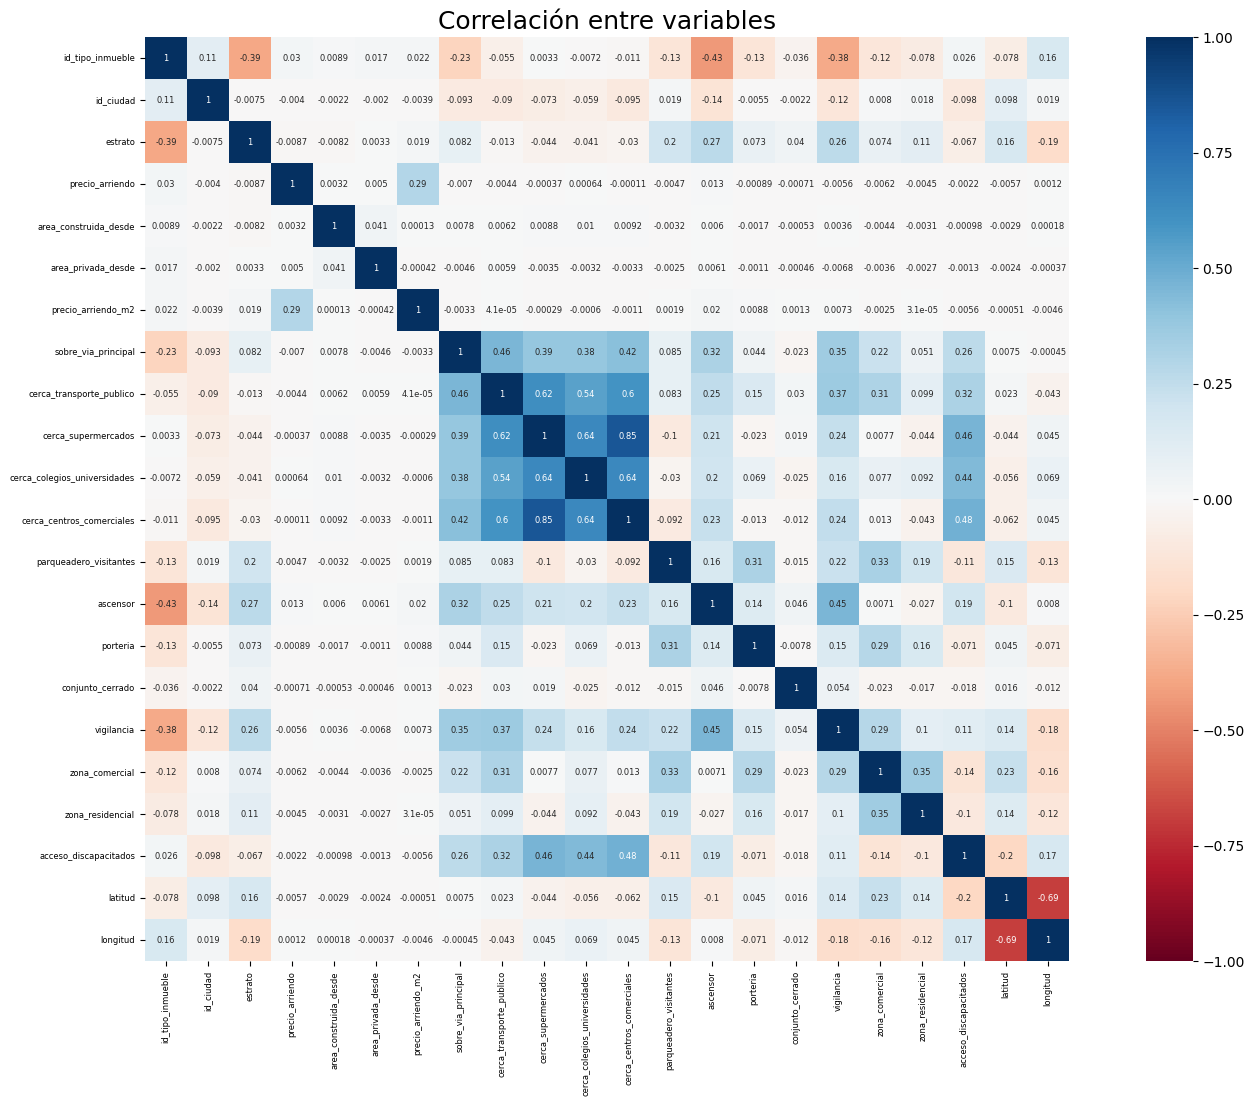

In [17]:
plt.figure(figsize=(20, 12))
sns.heatmap(data.corr(), annot=True, square=True, cmap='RdBu', vmax=1, vmin=-1, annot_kws={"size": 6})
plt.title('Correlación entre variables', size=18)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

**Cerca_centros_comerciales y cerca_supermercados (Correlación 0.85):** La alta correlación positiva (0.85) entre estas dos variables sugiere que cuando una propiedad está cerca de centros comerciales, es muy probable que también esté cerca de supermercados. Esto tiene sentido, ya que los supermercados suelen estar ubicados dentro de centros comerciales o en sus proximidades. Si una propiedad está cerca de un centro comercial, es probable que también esté cerca de un supermercado.

**Cerca_centros_comerciales y cerca_colegios_universidades (Correlación 0.64):** La correlación positiva (0.64) indica que la proximidad a centros comerciales se relaciona con la proximidad a colegios y universidades. Esto podría deberse a que las zonas que albergan centros comerciales también atraen instituciones educativas, lo que puede generar una mayor demanda de viviendas en esas áreas.

**Cerca_centros_comerciales y cerca_transporte_publico (Correlación 0.6):** La correlación positiva (0.6) sugiere que la proximidad a centros comerciales se relaciona con la proximidad al transporte público. Esto tiene sentido, ya que los centros comerciales suelen ubicarse en áreas accesibles con buena conectividad de transporte público para atraer a los consumidores.

**Sobre_via_principal, cerca_transporte_publico, cerca_supermercados, cerca_colegios_universidades y cerca_centros_comerciales (Correlaciones Positivas considerables):** Todas estas variables tienen altas o moderadas correlaciones positivas entre sí. Esto indica que la proximidad a vías principales, transporte público, supermercados, colegios/universidades y centros comerciales tiende a ocurrir juntas. Es decir, si una propiedad tiene una de estas características cercanas, es probable que también tenga otras.

**Precio_arriendo, area_construida_desde y area_privada_desde con precio_arriendo_m2 (Correlaciones no elevadas):** A pesar de que se podría esperar una correlación alta entre el precio de arriendo y el precio de arriendo por metro cuadrado, no se observa una correlación fuerte. Esto podría sugerir que pueden existen otros factores que influyen en el precio de arriendo.

**Correlación negativa entre latitud y longitud:** La correlación negativa entre latitud y longitud es común, ya que se relacionan con la ubicación geográfica de las propiedades. Si aumenta la latitud, disminuye la longitud y viceversa. Esto se debe a la forma en que se representan las coordenadas geográficas en la Tierra. Por lo tanto, esta correlación es esperada y tiene sentido en el contexto de datos geográficos.

###**Análisis univariado**

Con el fin de reflejar gráficamente el comportamiento descrito de las variables cuantativas continuas más importantes se presentan los gráficos de densidad, separados por tipo de inmueble ya que sin esta separación, no se aporta mayor información debido a la elevada asimetría y curtosis de los datos.

####**Precio de arriendo**

<ipython-input-10-e0b6cf891e0f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo'], shade=True)
<ipython-input-10-e0b6cf891e0f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo'], shade=True)
<ipython-input-10-e0b6cf891e0f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo'], shade=True)
<ipython-input-10-e0b6cf891e0f>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update yo

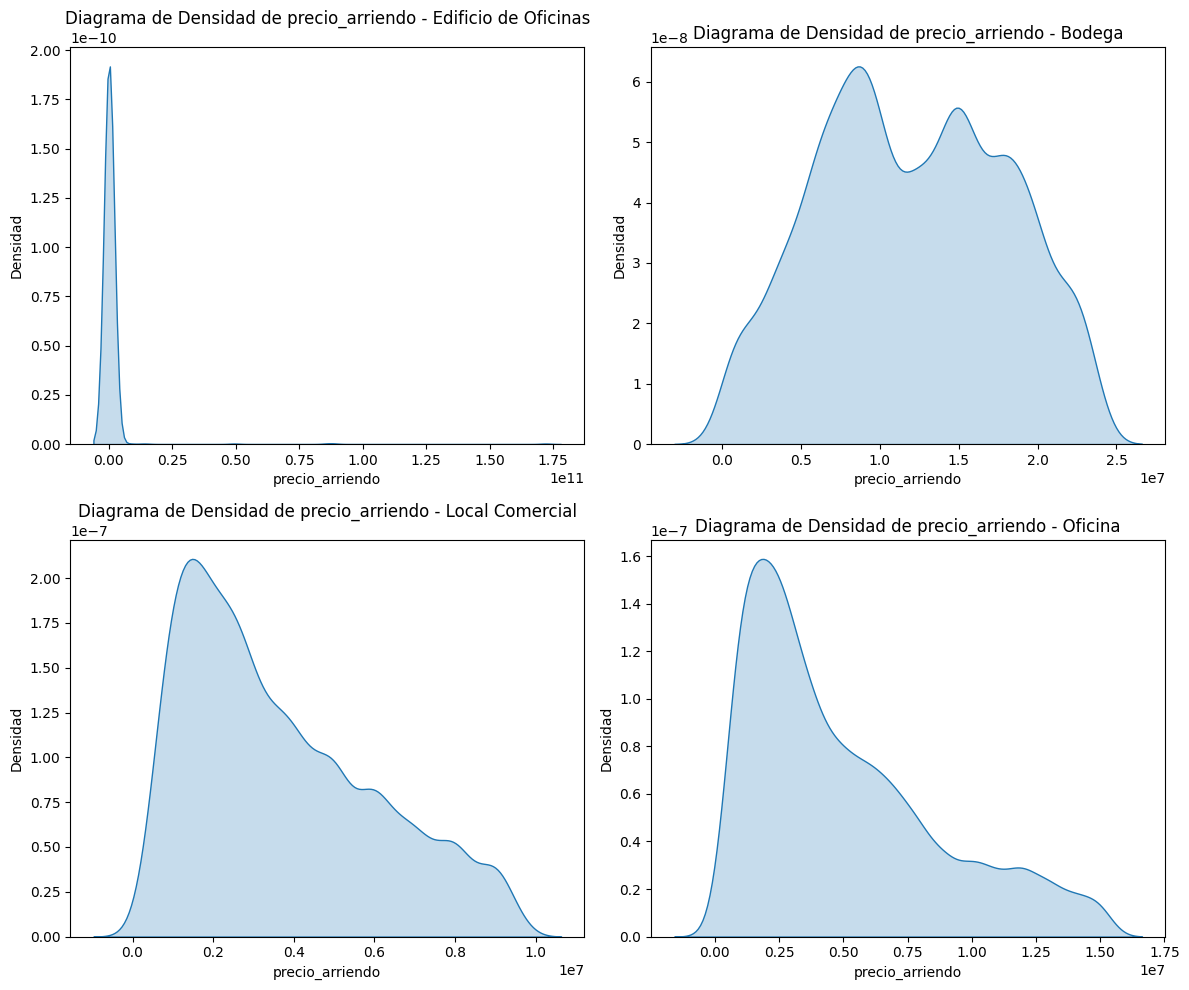

In [10]:
plt.figure(figsize=(12, 10))
tipos_inmueble = data['tipo_inmueble'].unique()
for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo'], shade=True)
    plt.title(f'Diagrama de Densidad de precio_arriendo - {tipo}')
    plt.xlabel('precio_arriendo')
    plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

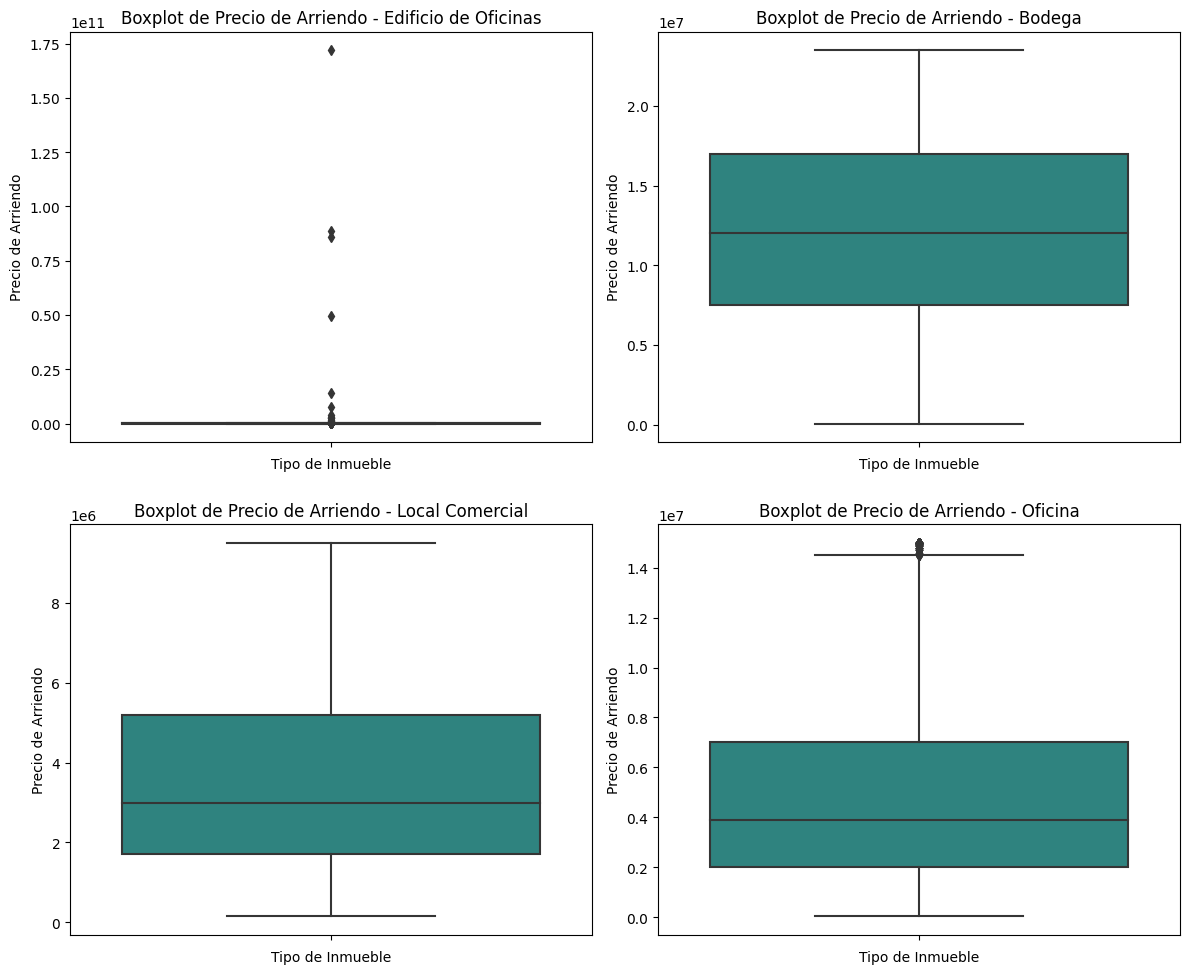

In [18]:
plt.figure(figsize=(12, 10))

tipos_inmueble = data['tipo_inmueble'].unique()

for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data[data['tipo_inmueble'] == tipo], y='precio_arriendo', palette='viridis')
    plt.title(f'Boxplot de Precio de Arriendo - {tipo}')
    plt.xlabel('Tipo de Inmueble')
    plt.ylabel('Precio de Arriendo')

plt.tight_layout()

plt.show()


Se observa una fuerte presencia de datos atípicos en tipo de inmueble Edficio de oficinas y una presencia no tan fuerte, en Oficinas.

####**Área construida desde**

<ipython-input-11-70eae2c70fef>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_construida_desde'], shade=True)
<ipython-input-11-70eae2c70fef>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_construida_desde'], shade=True)
<ipython-input-11-70eae2c70fef>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_construida_desde'], shade=True)
<ipython-input-11-70eae2c70fef>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0

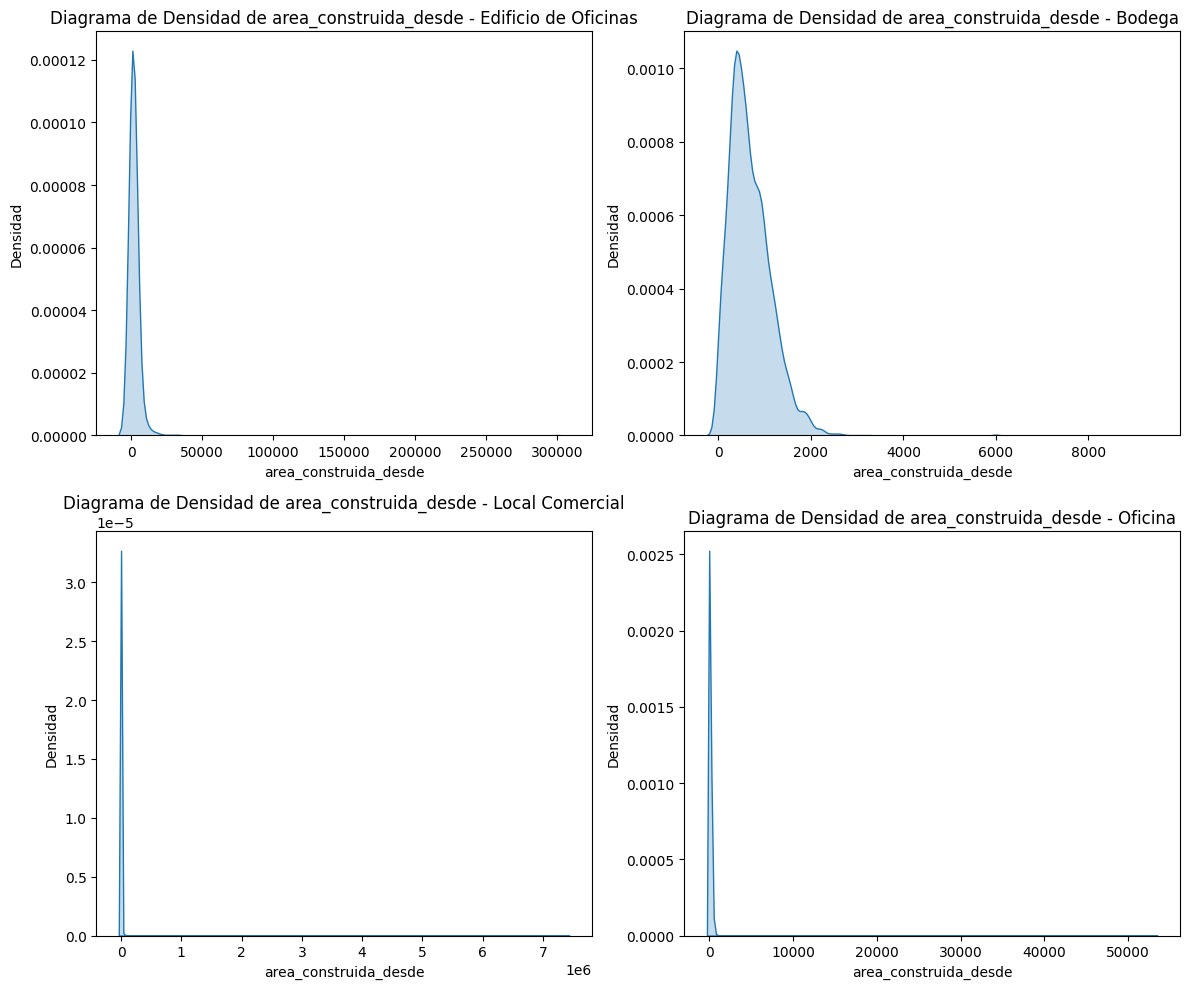

In [11]:
plt.figure(figsize=(12, 10))
tipos_inmueble = data['tipo_inmueble'].unique()
for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_construida_desde'], shade=True)
    plt.title(f'Diagrama de Densidad de area_construida_desde - {tipo}')
    plt.xlabel('area_construida_desde')
    plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

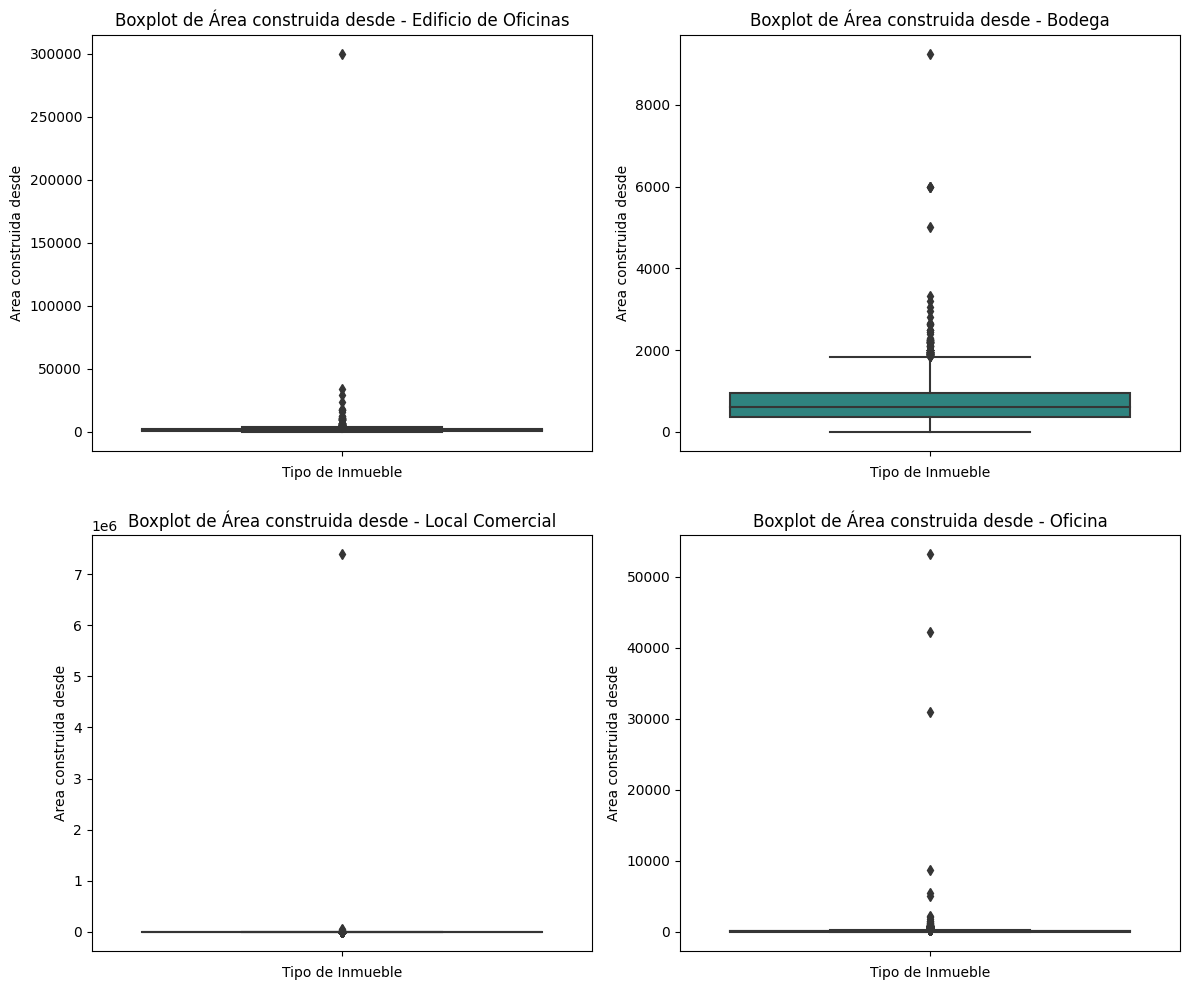

In [19]:
plt.figure(figsize=(12, 10))

tipos_inmueble = data['tipo_inmueble'].unique()

for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data[data['tipo_inmueble'] == tipo], y='area_construida_desde', palette='viridis')
    plt.title(f'Boxplot de Área construida desde - {tipo}')
    plt.xlabel('Tipo de Inmueble')
    plt.ylabel('Area construida desde')

plt.tight_layout()

plt.show()


Se observa una fuerte presencia de datos atípicos en todos los tipos de inmuebles para el área construida, principalmente en locales comerciales y edificos de oficinas.

####**Área privada desde**

<ipython-input-12-ad6d16282ca3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_privada_desde'], shade=True)
<ipython-input-12-ad6d16282ca3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_privada_desde'], shade=True)
<ipython-input-12-ad6d16282ca3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_privada_desde'], shade=True)
<ipython-input-12-ad6d16282ca3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please 

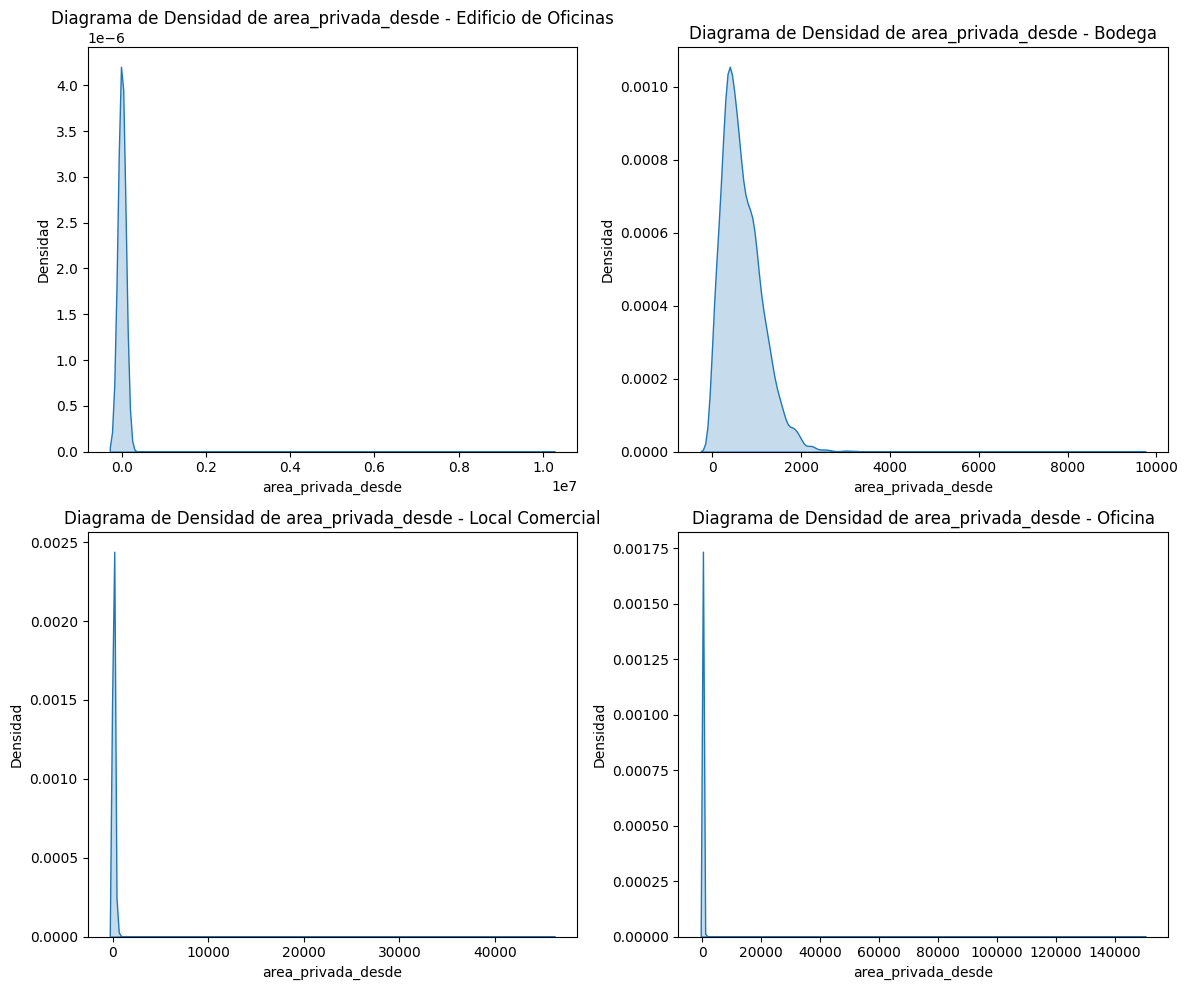

In [12]:
plt.figure(figsize=(12, 10))
tipos_inmueble = data['tipo_inmueble'].unique()
for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data[data['tipo_inmueble'] == tipo]['area_privada_desde'], shade=True)
    plt.title(f'Diagrama de Densidad de area_privada_desde - {tipo}')
    plt.xlabel('area_privada_desde')
    plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

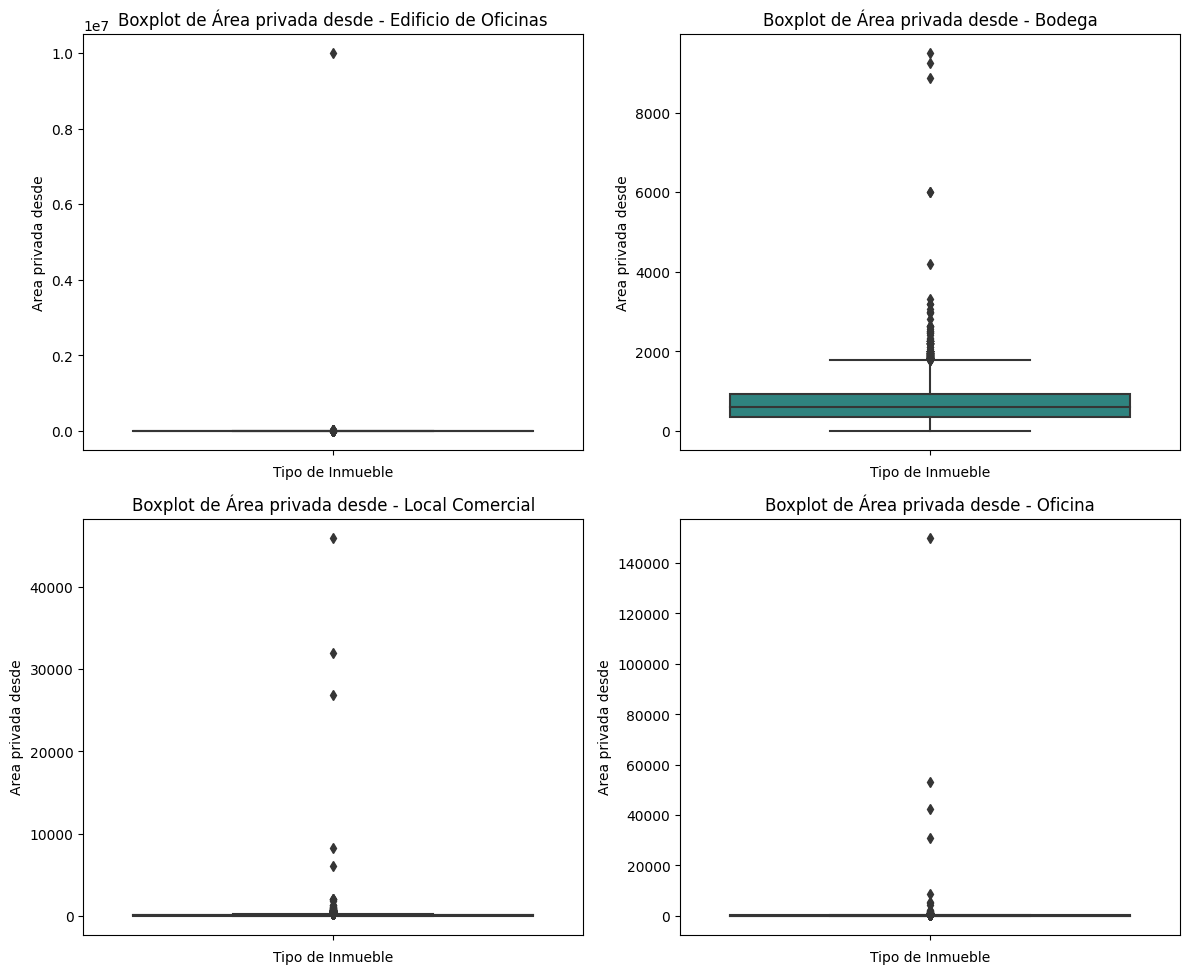

In [20]:
plt.figure(figsize=(12, 10))

tipos_inmueble = data['tipo_inmueble'].unique()

for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data[data['tipo_inmueble'] == tipo], y='area_privada_desde', palette='viridis')
    plt.title(f'Boxplot de Área privada desde - {tipo}')
    plt.xlabel('Tipo de Inmueble')
    plt.ylabel('Area privada desde')

plt.tight_layout()

plt.show()

En áre privada también se observa presencia de datos atípicos, principalmente en Edificos de oficina.

####**Precio arriendo m2**

<ipython-input-13-75c83896eda3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo_m2'], shade=True)
<ipython-input-13-75c83896eda3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo_m2'], shade=True)
<ipython-input-13-75c83896eda3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo_m2'], shade=True)
<ipython-input-13-75c83896eda3>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please 

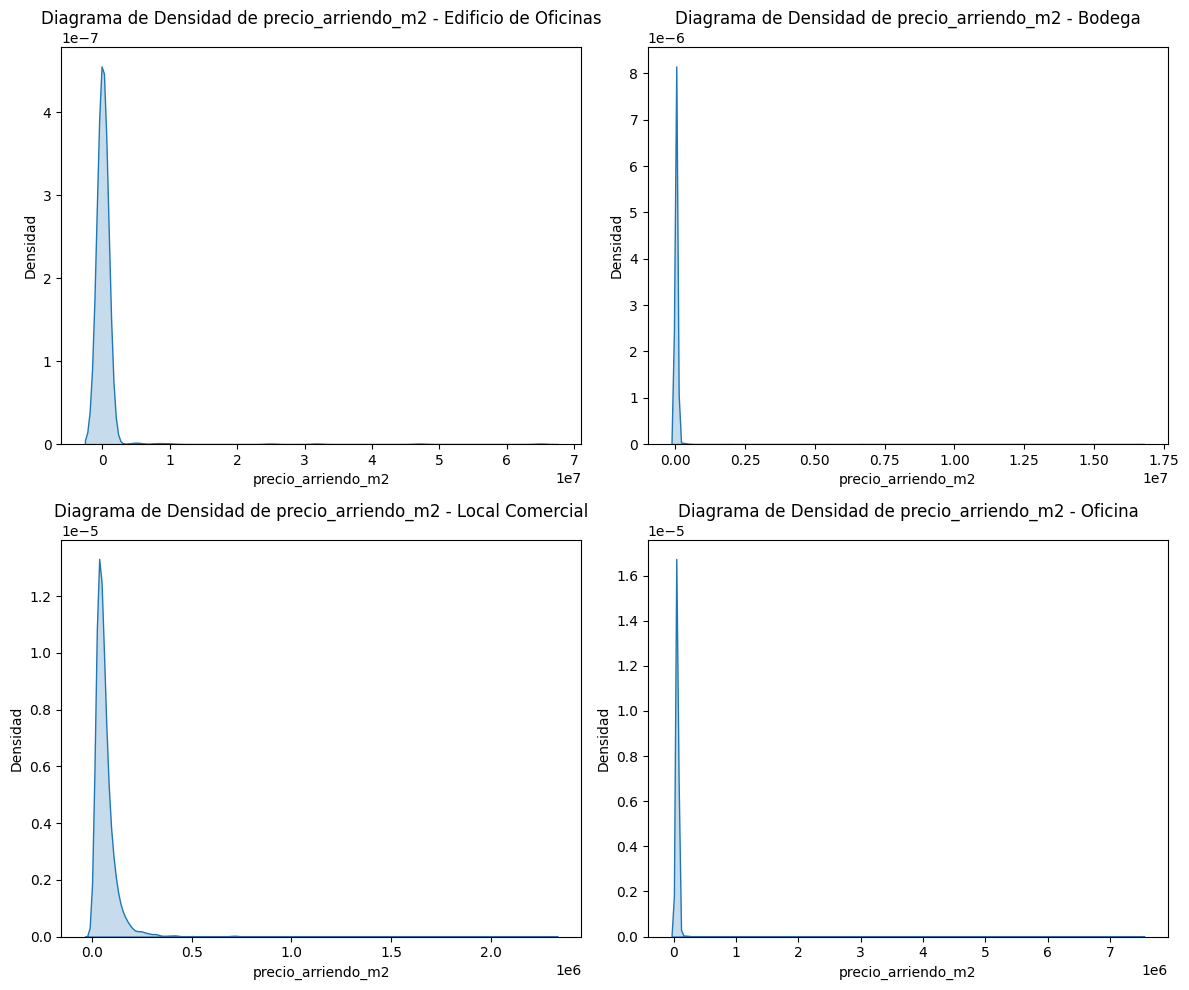

In [13]:
plt.figure(figsize=(12, 10))
tipos_inmueble = data['tipo_inmueble'].unique()
for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(data[data['tipo_inmueble'] == tipo]['precio_arriendo_m2'], shade=True)
    plt.title(f'Diagrama de Densidad de precio_arriendo_m2 - {tipo}')
    plt.xlabel('precio_arriendo_m2')
    plt.ylabel('Densidad')
plt.tight_layout()
plt.show()

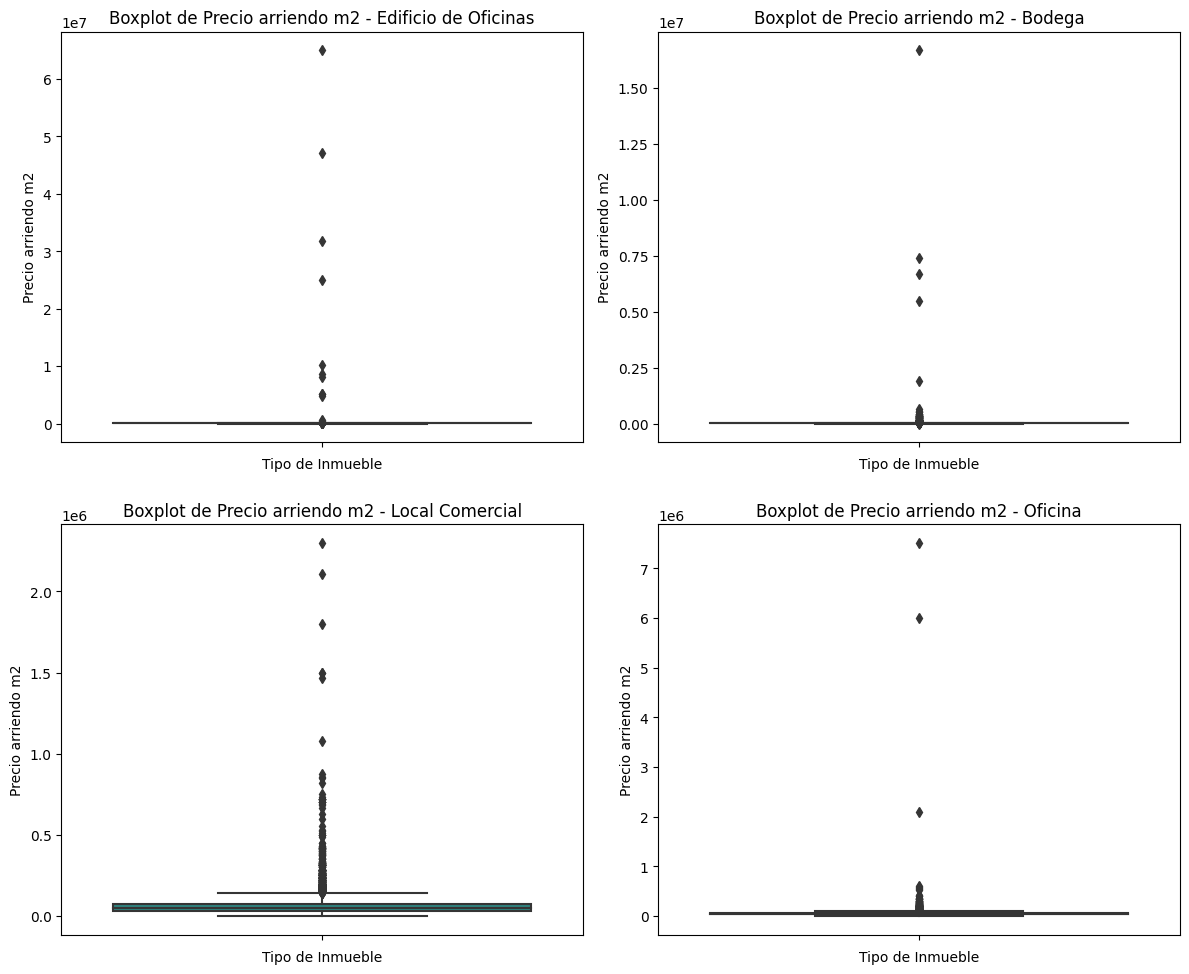

In [21]:
plt.figure(figsize=(12, 10))

tipos_inmueble = data['tipo_inmueble'].unique()

for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=data[data['tipo_inmueble'] == tipo], y='precio_arriendo_m2', palette='viridis')
    plt.title(f'Boxplot de Precio arriendo m2 - {tipo}')
    plt.xlabel('Tipo de Inmueble')
    plt.ylabel('Precio arriendo m2')

plt.tight_layout()

plt.show()

Y en definitiva, el precio arriendo por metro cuadrado presenta también datos atípicos.

####**Estrato**

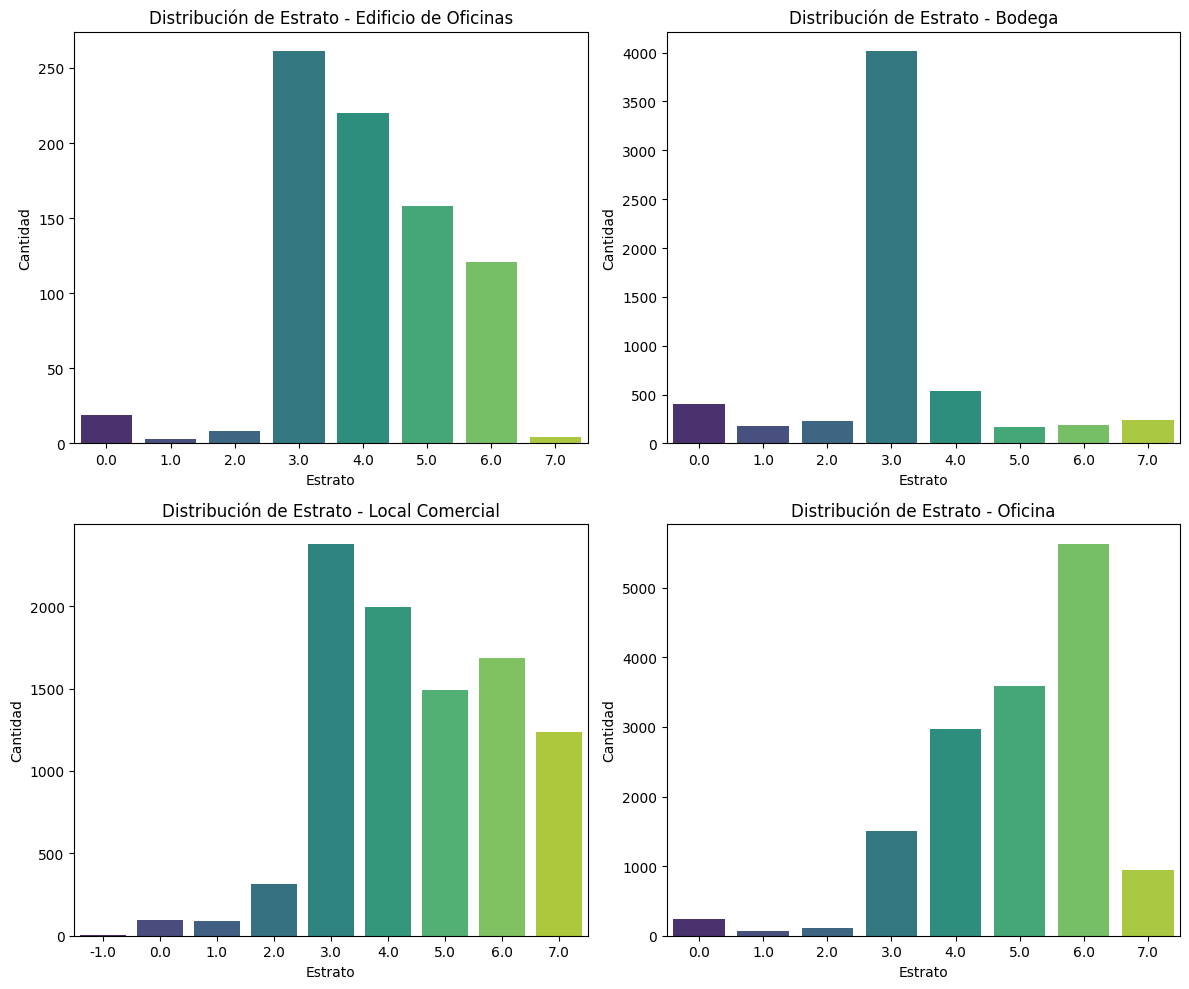

In [15]:
plt.figure(figsize=(12, 10))

tipos_inmueble = data['tipo_inmueble'].unique()

for i, tipo in enumerate(tipos_inmueble):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=data[data['tipo_inmueble'] == tipo], x='estrato', palette='viridis')
    plt.title(f'Distribución de Estrato - {tipo}')
    plt.xlabel('Estrato')
    plt.ylabel('Cantidad')

plt.tight_layout()

plt.show()



Se obtienen las mismas conclusiones que con la estadística descriptiva.


###**Limpieza de los datos**

Se genera un nuevo dataframe con los siguientes puntos a tener en cuenta:


*   Debido a que los missing values no son proporcionalmente considerables entonces se eliminarán todos los missing values. No se realiza imputación de datos.
*   Debido a la alta presencia de valores atípicos se decide podar la data para que considere para las variables cuantitativas continuas, solo hasta su percentil 98 para cada tipo de inmueble. No se eliminan del todo los valores atípicos ya que si bien pueden afectar el rendimiento del modelo, antes de tomar una decisión de eliminar estos registros, sería importante investigar un poco más para entender por qué están presentes estos outliers. ¿Es posible que estos registros representen situaciones o casos extremos pero legítimos en los datos?

Desde el punto de vista de negocio, las razones para que se registre esta presencia de outliers pueden ser:

Diversidad de tipos de inmueble: Cada tipo de inmueble puede tener características y precios muy diferentes. Por ejemplo, los edificios de oficinas pueden variar significativamente en tamaño y ubicación, lo que resulta en una amplia gama de precios. Esto se refleja en la variabilidad de 'precio_arriendo' por tipo de inmueble.

Ubicación: La ubicación es un factor clave en los precios de arriendo. Los inmuebles en áreas más exclusivas o céntricas de una ciudad tienden a tener precios más altos. Algunos tipos de inmuebles pueden estar más concentrados en ciertas zonas, lo que afecta la variabilidad de precios. Por ejemplo, los edificios de oficinas en el centro de una ciudad pueden tener precios mucho más altos que los ubicados en áreas menos céntricas.

Tamaño y calidad: La variable 'area_construida_desde' y 'area_privada_desde' representa el tamaño del inmueble. Inmuebles de mayor tamaño tienden a tener precios más altos. Además, la calidad de la construcción y las comodidades ofrecidas pueden influir en los precios.

Otros como efectos estacionales, características particulares o hasta errores de registro pueden incidir en las medidas.

In [43]:
# Se crea un nuevo DataFrame eliminando registros con NaNs
data_cleaned = data.dropna()

# Calcular los percentiles 98 para cada variable
percentile_98 = data_cleaned.groupby('tipo_inmueble')[['precio_arriendo', 'area_construida_desde', 'area_privada_desde', 'precio_arriendo_m2']].quantile(0.98)

# Filtrar registros con valores superiores al percentil 98 por tipo_inmueble
new_data = data_cleaned[data_cleaned['tipo_inmueble'].map(lambda x: x in percentile_98.index) &
                           (data_cleaned['precio_arriendo'] <= data_cleaned['tipo_inmueble'].map(lambda x: percentile_98['precio_arriendo'].get(x))) &
                           (data_cleaned['area_construida_desde'] <= data_cleaned['tipo_inmueble'].map(lambda x: percentile_98['area_construida_desde'].get(x))) &
                           (data_cleaned['area_privada_desde'] <= data_cleaned['tipo_inmueble'].map(lambda x: percentile_98['area_privada_desde'].get(x))) &
                           (data_cleaned['precio_arriendo_m2'] <= data_cleaned['tipo_inmueble'].map(lambda x: percentile_98['precio_arriendo_m2'].get(x)))]

# Mostrar el nuevo DataFrame con registros limpios y valores filtrados
print(new_data)


              tipo_inmueble  id_tipo_inmueble        ciudad  id_ciudad  \
0      Edificio de Oficinas                10   Bogotá D.C.          1   
1      Edificio de Oficinas                10          Cali          4   
2      Edificio de Oficinas                10   Bogotá D.C.          1   
3      Edificio de Oficinas                10   Bogotá D.C.          1   
4      Edificio de Oficinas                10   Bogotá D.C.          1   
...                     ...               ...           ...        ...   
31498       Local Comercial                 6      Medellín          3   
31499               Oficina                 3      Medellín          3   
31500       Local Comercial                 6  Barranquilla          5   
31501       Local Comercial                 6      Medellín          3   
31502               Oficina                 3   Bogotá D.C.          1   

      barrio_catastral          antiguedad  estrato  precio_arriendo  \
0       SAMPER MENDOZA   Entre 5 y 10 a

Luego de la limpieza se obtienen 28488 registros. No se tienen missing values y además se podó de manera prudente los registros muy extremos. Ahora, para el propósito del modelo, es necesario quitar los elementos duplicados ya que no aportan mayor valor al entrenamiento.

In [44]:
# Verificar duplicados en el nuevo dataFrame
duplicados = new_data[new_data.duplicated()]
num_duplicados = duplicados.shape[0]
print("Registros duplicados encontrados:")
print(duplicados)
print(f"Total de registros duplicados: {num_duplicados}")

Registros duplicados encontrados:
         tipo_inmueble  id_tipo_inmueble        ciudad  id_ciudad  \
43     Local Comercial                 6  Barranquilla          5   
161    Local Comercial                 6   Bogotá D.C.          1   
211    Local Comercial                 6   Bogotá D.C.          1   
220    Local Comercial                 6   Bogotá D.C.          1   
306    Local Comercial                 6   Bogotá D.C.          1   
...                ...               ...           ...        ...   
31427          Oficina                 3      Medellín          3   
31450          Oficina                 3      Medellín          3   
31451          Oficina                 3      Medellín          3   
31461          Oficina                 3   Bogotá D.C.          1   
31466          Oficina                 3   Bogotá D.C.          1   

            barrio_catastral          antiguedad  estrato  precio_arriendo  \
43           ALTOS DEL PRADO    Entre 0 y 5 años      6.0  

In [45]:
new_data = new_data.drop_duplicates()
print(new_data.shape)
new_data.head()

(26872, 26)


,tipo_inmueble,id_tipo_inmueble,ciudad,id_ciudad,barrio_catastral,antiguedad,estrato,precio_arriendo,area_construida_desde,area_privada_desde,...,parqueadero_visitantes,ascensor,porteria,conjunto_cerrado,vigilancia,zona_comercial,zona_residencial,acceso_discapacitados,latitud,longitud
0,Edificio de Oficinas,10,Bogotá D.C.,1,SAMPER MENDOZA,Entre 5 y 10 años,3.0,65000000.0,3000.00,3000.00,...,0,1,0,0,0,0,0,0,0.000000,0.000000
1,Edificio de Oficinas,10,Cali,4,TEQUENDAMA,Más de 20 años,5.0,18000000.0,423.00,423.00,...,0,0,0,0,1,0,0,0,3.421000,-76.544000
2,Edificio de Oficinas,10,Bogotá D.C.,1,LA SOLEDAD,Más de 20 años,4.0,20000000.0,680.00,680.00,...,0,1,0,0,0,0,0,0,4.624383,-74.074930
3,Edificio de Oficinas,10,Bogotá D.C.,1,LA CASTELLANA,Entre 5 y 10 años,5.0,43500000.0,1326.00,1326.00,...,0,0,0,0,0,0,0,0,4.685467,-74.061356
4,Edificio de Oficinas,10,Bogotá D.C.,1,CHICO NORTE II,Entre 10 y 20 años,6.0,98599380.0,1493.93,1493.93,...,0,1,0,0,1,0,0,0,4.681372,-74.048590


El dataframe resultante contiene ahora 26872 registros diferentes.

###**Selección de variables**

Se elimina la variable cerca_supermercados debido a su alta correlación con la variable cerca_centros_comerciales, de hecho, se considera que esta variable guarda estrecha relación con su grupo de variables, sin embargo, solo se decide eliminar cerca_supermercados para evitar problemas de multicolinealidad. No usaremos PCA, ni LDA, ni otras técnicas. También se elimina la variable tipo_inmueble y ciudad pues son variables categóricas que aportan la misma información que sus variables equivalentes en id. Mejor se realizará selección usando regularización directamente en los modelos. Las variables asociadas a localización como barrio_castral y latitud y longitud no se remueven aún por evaluar en la regularización como se comportan, es posible que aporten información importante.



In [46]:
new_data = new_data.drop(['cerca_supermercados', 'tipo_inmueble', 'ciudad'], axis=1)
print(new_data.shape)
new_data.head()

(26872, 23)


,id_tipo_inmueble,id_ciudad,barrio_catastral,antiguedad,estrato,precio_arriendo,area_construida_desde,area_privada_desde,precio_arriendo_m2,sobre_via_principal,...,parqueadero_visitantes,ascensor,porteria,conjunto_cerrado,vigilancia,zona_comercial,zona_residencial,acceso_discapacitados,latitud,longitud
0,10,1,SAMPER MENDOZA,Entre 5 y 10 años,3.0,65000000.0,3000.00,3000.00,21666.666667,0,...,0,1,0,0,0,0,0,0,0.000000,0.000000
1,10,4,TEQUENDAMA,Más de 20 años,5.0,18000000.0,423.00,423.00,42553.191489,1,...,0,0,0,0,1,0,0,0,3.421000,-76.544000
2,10,1,LA SOLEDAD,Más de 20 años,4.0,20000000.0,680.00,680.00,29411.764706,0,...,0,1,0,0,0,0,0,0,4.624383,-74.074930
3,10,1,LA CASTELLANA,Entre 5 y 10 años,5.0,43500000.0,1326.00,1326.00,32805.429864,0,...,0,0,0,0,0,0,0,0,4.685467,-74.061356
4,10,1,CHICO NORTE II,Entre 10 y 20 años,6.0,98599380.0,1493.93,1493.93,66000.000000,0,...,0,1,0,0,1,0,0,0,4.681372,-74.048590


In [47]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26872 entries, 0 to 31502
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_tipo_inmueble              26872 non-null  int64  
 1   id_ciudad                     26872 non-null  int64  
 2   barrio_catastral              26872 non-null  object 
 3   antiguedad                    26872 non-null  object 
 4   estrato                       26872 non-null  float64
 5   precio_arriendo               26872 non-null  float64
 6   area_construida_desde         26872 non-null  float64
 7   area_privada_desde            26872 non-null  float64
 8   precio_arriendo_m2            26872 non-null  float64
 9   sobre_via_principal           26872 non-null  int64  
 10  cerca_transporte_publico      26872 non-null  int64  
 11  cerca_colegios_universidades  26872 non-null  int64  
 12  cerca_centros_comerciales     26872 non-null  int64  
 13  p

El dataset resultante contiene 23 variables en total, de las cuales 22 se comportan como variables predictoras y una como variable respuesta.

###**Modelos de aprendizaje automático**

####**Regresión ridge**

Primero, se definen las columnas que se utilizarán como características para predecir la variable objetivo 'precio_arriendo'. Luego, los datos se dividen en conjuntos de entrenamiento y prueba. A continuación, se crea un modelo Ridge inicial, que es una versión regularizada del modelo de regresión lineal. Se define una cuadrícula de parámetros para el hiperparámetro 'alpha' del modelo Ridge, y se realiza una búsqueda de cuadrícula con validación cruzada para encontrar el valor óptimo de 'alpha' que minimiza el error cuadrático medio. Una vez encontrado el mejor parámetro, se vuelve a entrenar el modelo con este y se hacen predicciones en el conjunto de prueba. Finalmente, se calculan y se muestran varias métricas de error para evaluar el rendimiento del modelo en el conjunto de prueba.

In [49]:
# Dividimos los datos en características (X) y la variable objetivo (y)
X = new_data.drop('precio_arriendo', axis=1)
y = new_data['precio_arriendo']

# Realizamos la codificación one-hot para las variables categóricas
X = pd.get_dummies(X, columns=['barrio_catastral', 'antiguedad', 'id_tipo_inmueble'], drop_first=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos la cuadrícula de hiperparámetros para la búsqueda de cuadrícula
param_grid = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Creamos un modelo de regresión Ridge
ridge = Ridge()

# Realizamos una búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Encontramos el mejor valor de alpha
best_alpha = grid_search.best_params_['alpha']

# Entrenamos el modelo Ridge con el mejor valor de alpha
final_model = Ridge(alpha=best_alpha)
final_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = final_model.predict(X_test)

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.68235e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.65097e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.57517e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.58076e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

MSE: 63744604214983.016
MAE: 2855197.7137424233
R^2: 0.772994254627085


MSE (Error Cuadrático Medio): 63744604214983.016, el Error Cuadrático Medio mide la calidad de las predicciones realizadas por el modelo de regresión. En este caso, el valor del MSE es bastante alto, lo que indica que las predicciones del modelo tienen un error cuadrático promedio elevado. Esto sugiere que las predicciones del modelo tienden a alejarse en gran medida de los valores reales de los precios de arriendo. Cuanto más bajo sea el MSE, mejor será el modelo en términos de precisión.

MAE (Error Absoluto Medio): 2855197.7137424233, el Error Absoluto Medio mide la magnitud promedio de los errores en las predicciones del modelo. En este caso, el MAE también es bastante alto, lo que significa que las predicciones del modelo tienden a desviarse en aproximadamente 2,855,197 pesos colombianos, en promedio, de los valores reales. Al igual que el MSE, un MAE más bajo indica un mejor rendimiento del modelo.

R^2 (Coeficiente de Determinación): 0.772994254627085, cuantifica la proporción de la varianza en la variable dependiente (precio de arriendo) que es explicada por el modelo. En este caso, un valor de R^2 de 0.773 indica que aproximadamente el 77.3% de la variabilidad en los precios de arriendo es explicada por las características incluidas en el modelo de regresión Ridge. Esto sugiere que el modelo tiene un grado moderado de capacidad para explicar y predecir los precios de arriendo.

####**Arbol de decisión**

Se implementa un Árbol de Decisión para regresión, optimizado a través de una búsqueda de cuadrícula (grid search) para encontrar los mejores hiperparámetros. Primero, selecciona un conjunto de características y divide los datos en conjuntos de entrenamiento y prueba. Luego, se crea una instancia del modelo de Árbol de Decisión. Se define un conjunto de parámetros para la búsqueda de cuadrícula, específicamente, diferentes valores para la profundidad máxima del árbol ("max_depth") y el número mínimo de muestras requeridas para dividir un nodo interno ("min_samples_split"). Utiliza la búsqueda de cuadrícula para encontrar la combinación de parámetros que minimiza el error cuadrático medio (MSE) en validación cruzada. Entrena un nuevo Árbol de Decisión con los mejores parámetros encontrados, y finalmente, evalúa el rendimiento del modelo en el conjunto de prueba, calculando el MSE, el error absoluto medio (MAE), y el coeficiente de determinación R^2.

In [52]:
# Dividimos los datos en características (X) y la variable objetivo (y)
X = new_data.drop('precio_arriendo', axis=1)
y = new_data['precio_arriendo']

# Realizamos la codificación one-hot para las variables categóricas
X = pd.get_dummies(X, columns=['barrio_catastral', 'antiguedad', 'id_tipo_inmueble'], drop_first=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos la grilla de parámetros para buscar
parameters = {'max_depth': range(1, 11), 'min_samples_split': range(2, 11)}

# Creamos un modelo de Árbol de Decisión para regresión
tree_model = DecisionTreeRegressor()

# Realizamos una búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(tree_model, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Encontramos los mejores parámetros
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Creamos un nuevo modelo de Árbol de Decisión con los mejores parámetros
best_tree_model = DecisionTreeRegressor(max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])

# Entrenamos el modelo con los datos de entrenamiento
best_tree_model.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = best_tree_model.predict(X_test)

# Calculamos las métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimimos las métricas
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)



Best parameters: {'max_depth': 8, 'min_samples_split': 4}
MSE: 22431136053835.188
MAE: 812616.1668315062
R^2: 0.9201187799003502


Los mejores hiperparámetros seleccionados por la búsqueda de cuadrícula son:
* Profundidad máxima del árbol (max_depth): 8.
* Número mínimo de muestras requeridas para dividir un nodo interno (min_samples_split): 4.

Estos hiperparámetros indican que el modelo considera un árbol de decisión con una profundidad máxima de 8 niveles y requerirá un mínimo de 4 muestras para dividir un nodo interno, lo que ayuda a evitar divisiones en nodos con muy pocas muestras.

Error cuadrático medio (MSE): 22431136053835.188, en este caso, el valor de MSE es bastante grande, lo que significa que el modelo tiene un cierto grado de error en sus predicciones. Sin embargo, el valor absoluto del MSE debe interpretarse en el contexto de los valores de las etiquetas. Dado que el precio del arriendo es probablemente una variable con un rango amplio, un MSE alto puede ser aceptable en este contexto.

MAE (Error Absoluto Medio): 812616.1668315062, lo que indica que, en promedio, las predicciones del modelo tienen un error absoluto de alrededor de $812,616.167 en términos de precio de arriendo.

R^2 (Coeficiente de Determinación): En este caso, el valor de R^2 es de 0.920, lo que sugiere que el modelo tiene un buen poder explicativo y es capaz de explicar aproximadamente el 92% de la variabilidad en los precios de arriendo. Esto indica un buen ajuste del modelo.

####**Red neuronal**

Se usa el módulo keras-tuner para realizar una búsqueda aleatoria de hiperparámetros y optimizar un modelo de redes neuronales profundas (deep learning) utilizando Keras y TensorFlow.

Primero, el código establece las columnas de características que se usarán y divide los datos en conjuntos de entrenamiento y prueba. Luego, se escalan las características para asegurar que todas estén en la misma escala, lo cual es especialmente importante para los algoritmos de aprendizaje automático que se basan en la distancia entre las características, como las redes neuronales. Se define una función build_model(hp) para construir un modelo de red neuronal secuencial, cuyo número de capas, unidades por capa y tasa de aprendizaje son definidos por un objeto hp, que es proporcionado por keras-tuner. Este objeto permite definir rangos de valores para los hiperparámetros, y keras-tuner buscará la mejor combinación de hiperparámetros dentro de estos rangos. Se instancia un objeto RandomSearch de keras-tuner, que realizará una búsqueda aleatoria de hiperparámetros utilizando la función build_model(hp) y optimizará el modelo para minimizar el error cuadrático medio en los datos de validación. Se realiza un número máximo de 5 pruebas de diferentes combinaciones de hiperparámetros, y cada prueba se ejecuta 3 veces para obtener un promedio. Una vez finalizada la búsqueda, se obtiene el mejor modelo, se entrena con los datos de entrenamiento durante 50 épocas, se realizan predicciones en los datos de prueba y se calcula el error cuadrático medio de estas predicciones.

In [54]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 kB 903.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 23.5 MB/s eta 0:00:00


In [55]:
# Dividimos los datos en características (X) y la variable objetivo (y)
X = new_data.drop('precio_arriendo', axis=1)  # Excluyendo la variable objetivo
y = new_data['precio_arriendo']

# Realizamos la codificación one-hot de las variables categóricas
categorical_cols = ['barrio_catastral', 'antiguedad', 'id_tipo_inmueble']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Estandarizamos las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
        model.add(layers.Dropout(0.1))  # Agregando Dropout
    model.add(layers.Dense(1, activation='linear'))  # Cambiando la función de activación a 'linear'
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error',
        metrics=['mean_squared_error'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=5,
    directory='my_dir',
    project_name='arriendo_prediction')

tuner.search(X_train, y_train, epochs=5, validation_split=0.2)

# Obtener el mejor modelo
best_model = tuner.get_best_models(num_models=1)[0]

# Entrenar el modelo
history = best_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Realizar predicciones
y_pred = best_model.predict(X_test)

# Calcular y mostrar las métricas de error
mse = mean_squared_error(y_test, y_pred)  # Utilizando función predefinida para calcular MSE
print(f'MSE: {mse}')


Trial 5 Complete [00h 01m 25s]
val_mean_squared_error: 74935040999424.0

Best val_mean_squared_error So Far: 47818156802048.0
Total elapsed time: 00h 06m 58s
Epoch 1/50
672/672 [==============================] - 19s 23ms/step - loss: 104453898240000.0000 - mean_squared_error: 104453898240000.0000 - val_loss: 56115261865984.0000 - val_mean_squared_error: 56115261865984.0000
Epoch 2/50
672/672 [==============================] - 16s 23ms/step - loss: 91862194978816.0000 - mean_squared_error: 91862194978816.0000 - val_loss: 323560186839040.0000 - val_mean_squared_error: 323560186839040.0000
Epoch 3/50
672/672 [==============================] - 23s 34ms/step - loss: 108757732294656.0000 - mean_squared_error: 108757732294656.0000 - val_loss: 46987374231552.0000 - val_mean_squared_error: 46987374231552.0000
Epoch 4/50
672/672 [==============================] - 22s 32ms/step - loss: 134955707400192.0000 - mean_squared_error: 134955707400192.0000 - val_loss: 131743306743808.0000 - val_mean_squa

El mejor valor para val_mean_squared_error en la búsqueda de hiperparámetros fue 47818156802048.0. Esto representa la puntuación de error cuadrático medio en el conjunto de validación al ajustar la red neuronal con diferentes configuraciones de hiperparámetros. Esta puntuación se utilizó para seleccionar el mejor modelo. Durante el entrenamiento de la red neuronal, se registraron las métricas de pérdida y error cuadrático medio en el conjunto de entrenamiento y en el conjunto de validación (val_loss y val_mean_squared_error) en cada época. Estas métricas proporcionan información sobre el rendimiento del modelo a medida que se entrena a lo largo de las épocas. El valor final de val_mean_squared_error en la última época del entrenamiento fue 74935040999424.0 Esto indica cuán bien se desempeñó el modelo en el conjunto de validación después de 50 épocas de entrenamiento. El error cuadrático medio (MSE) en el conjunto de prueba, calculado después de entrenar el modelo durante 50 épocas, fue aproximadamente 41417891495315.81 Esto representa cuán bien se desempeña el modelo en datos no vistos.

El modelo de red neuronal parece tener dificultades en la generalización, ya que el valor de val_mean_squared_error en la búsqueda de hiperparámetros es alto y el MSE en el conjunto de prueba también es alto.

####**Conclusión de los modelos**

El modelo de Árbol de decisión para regresión es el mejor entre las tres opciones. Por lo siguiente:

Error cuadrático medio (MSE): El modelo de Árbol de decisión tiene el valor de MSE más bajo, que es 22431136053835.188, en comparación con la Regresión Ridge (63744604214983.016) y la Red Neuronal (41417891495315.81). Un valor de MSE más bajo indica un mejor ajuste del modelo a los datos.

Error absoluto medio (MAE): El modelo de Árbol de decisión también tiene el valor de MAE más bajo, que es 812616.1668315062, en comparación con la Regresión Ridge (2855197.7137424233). Como el MAE mide el promedio de las diferencias absolutas entre las predicciones y los valores reales, un valor más bajo sugiere un mejor rendimiento del modelo.

Coeficiente de determinación (R^2): El modelo de Árbol de decisión tiene un valor de R^2 de 0.9201187799003502, que es mucho más alto en comparación con la Regresión Ridge (0.772994254627085). El valor de R^2 cercano a 1 indica que el modelo de Árbol de Decisión explica una gran parte de la variabilidad en los datos.

Dado que el Árbol de decisión para regresión tiene el MSE más bajo, el MAE más bajo y el valor de R^2 más alto, es la mejor opción para predecir el precio del arriendo.